# Análisis de desviación típica entre precio medio real y predicho

### Importación de librerías

In [1]:
import pandas as pd
try:
    from utils.visualizacion import precios_distrito_ano, comparar_precios
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    from utils.visualizacion import precios_distrito_ano, comparar_precios
except Exception as e:
    print(f'--> Error: {e}')

### Importación de dataset

In [2]:
df = pd.read_csv('../data/processed/viviendas_2011_2024_nodrop.csv')

### Generación de gráficas

GRÁFICA DE PRECIO MEDIO REAL DE VENTAS Y ALQUILERES

--> Gráfica guardada en reports/figures/precio_venta_real.png


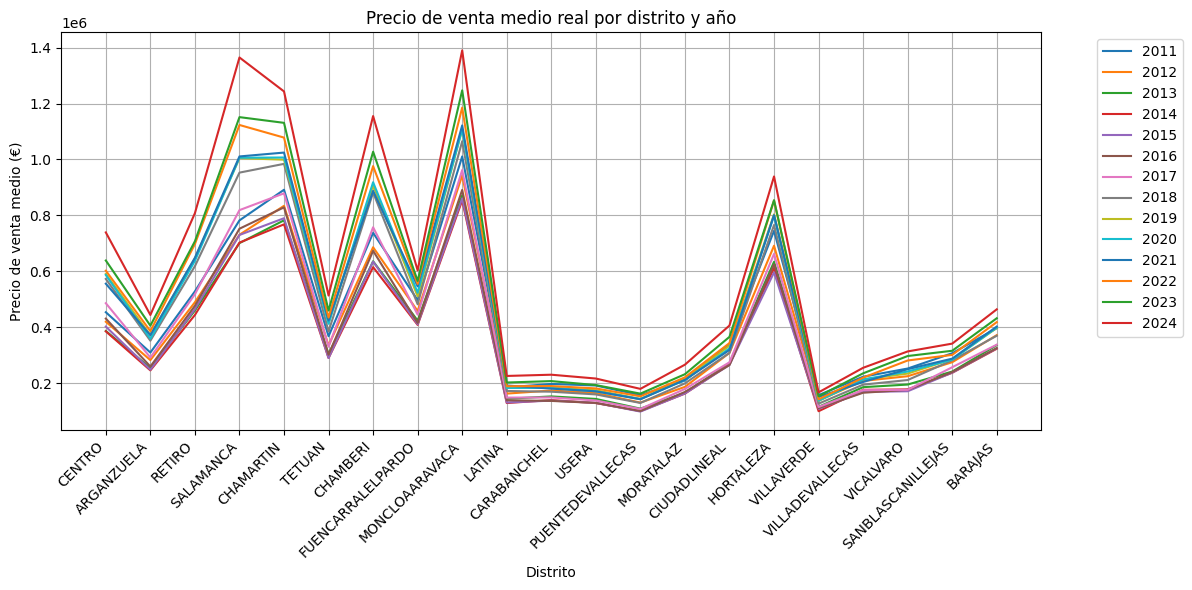

In [3]:
precios_distrito_ano(df, operacion='venta', valor='real')

--> Gráfica guardada en reports/figures/precio_alquiler_real.png


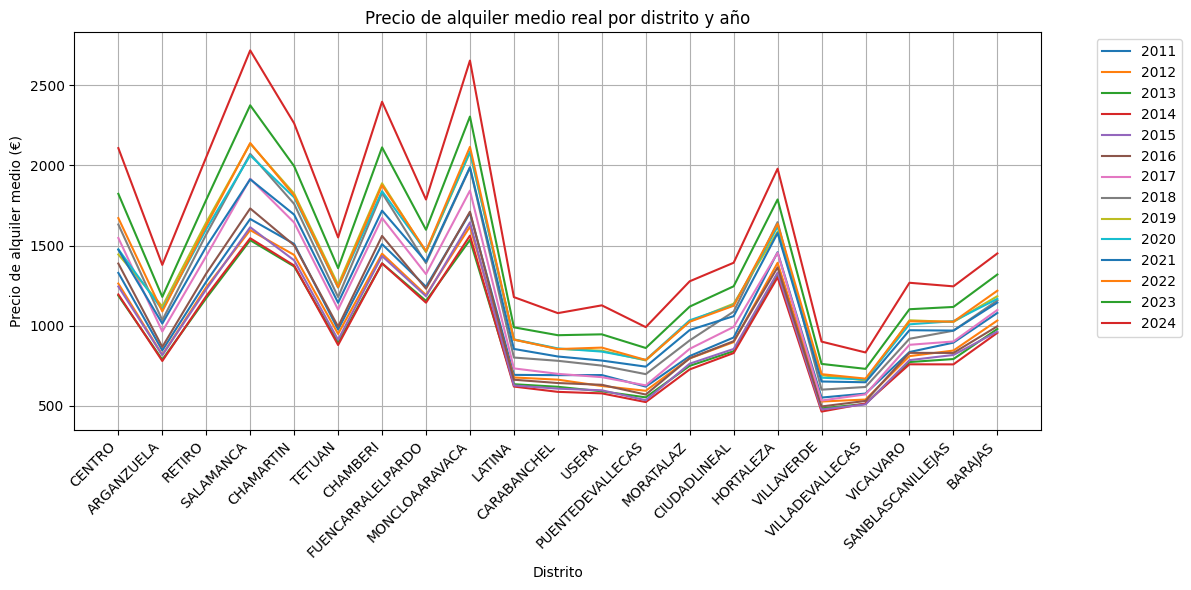

In [4]:
precios_distrito_ano(df, operacion='alquiler', valor='real')

GRÁFICA DE PRECIO MEDIO PREDICHO DE VENTAS Y ALQUILERES

--> Gráfica guardada en reports/figures/precio_venta_predicho.png


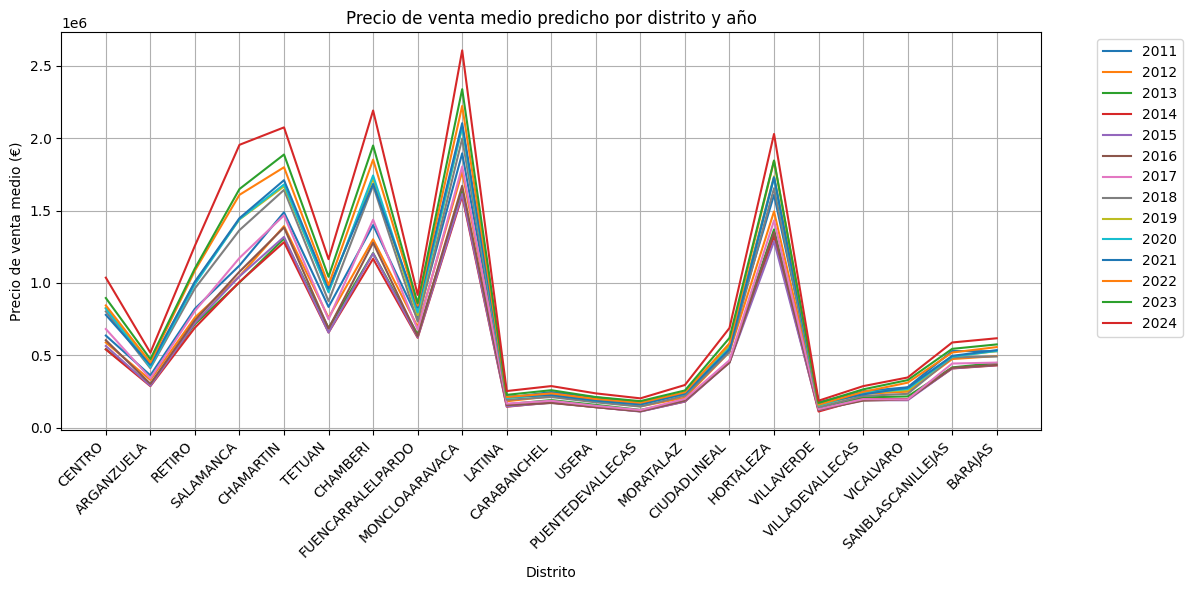

In [5]:
precios_distrito_ano(df, operacion='venta', valor='predicho')

--> Gráfica guardada en reports/figures/precio_alquiler_predicho.png


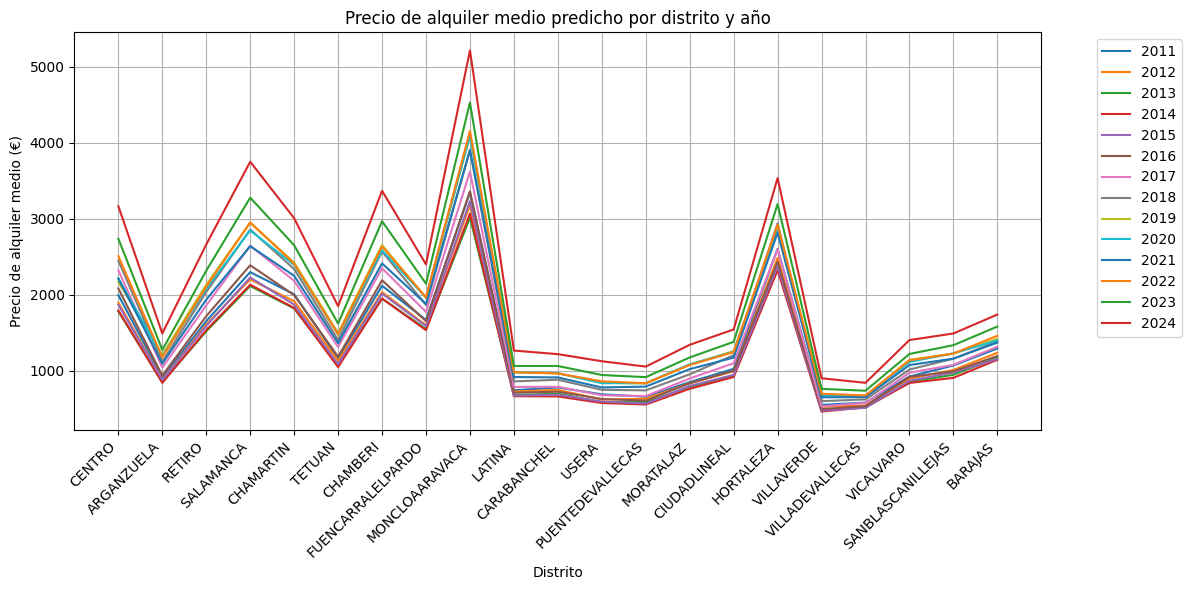

In [6]:
precios_distrito_ano(df, operacion='alquiler', valor='predicho')

GRÁFICA COMPARATIVA DE MEDIA DE PRECIOS DE VENTA Y ALQUILER ENTRE REAL Y PREDICHO

In [7]:
df_prueba = pd.read_csv('../data/final/prueba.csv')

--> Gráfica guardada en reports/figures/precio_venta_real_vs_predicho_previo.png


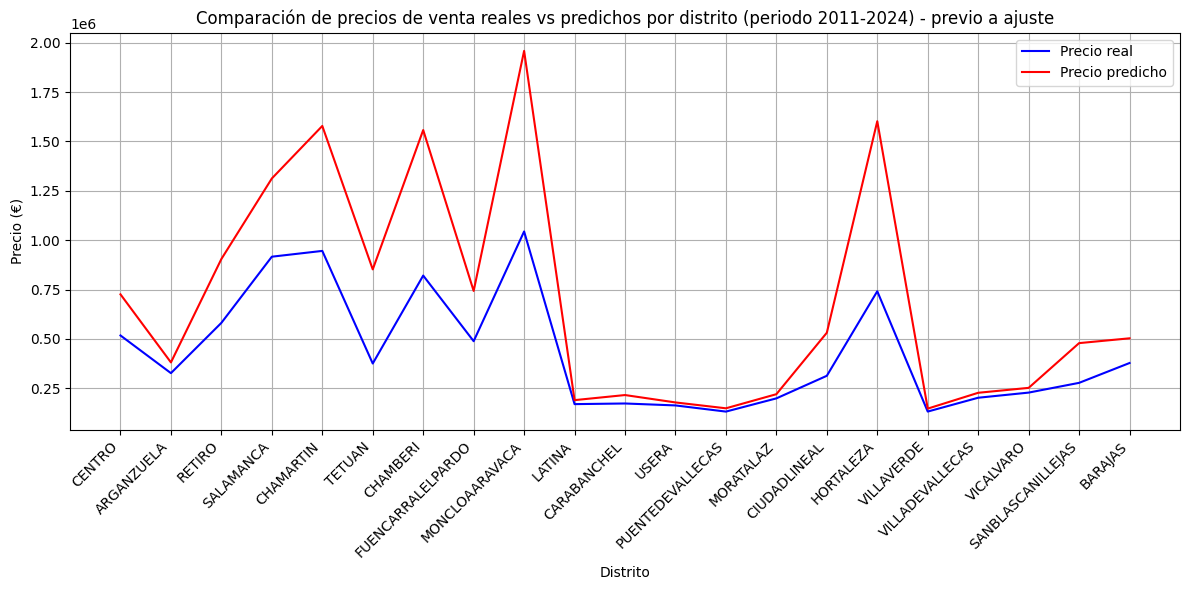

In [8]:
comparar_precios(df_prueba, operacion='venta', ajustado=False)

--> Gráfica guardada en reports/figures/precio_venta_real_vs_predicho_posterior.png


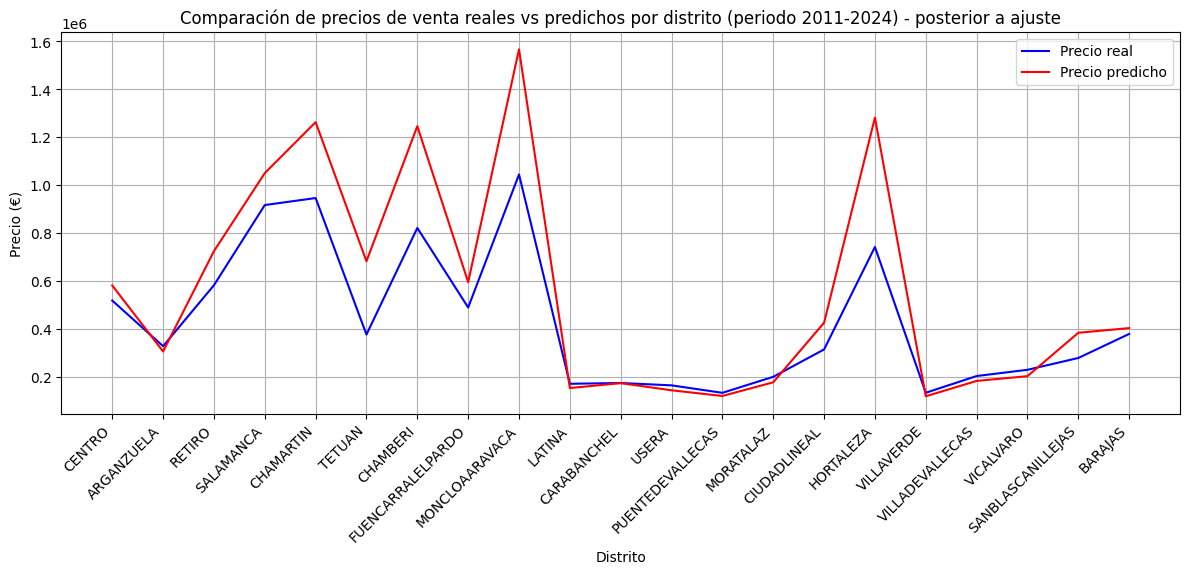

In [9]:
comparar_precios(df_prueba, operacion='venta', ajustado=True)

--> Gráfica guardada en reports/figures/precio_alquiler_real_vs_predicho_previo.png


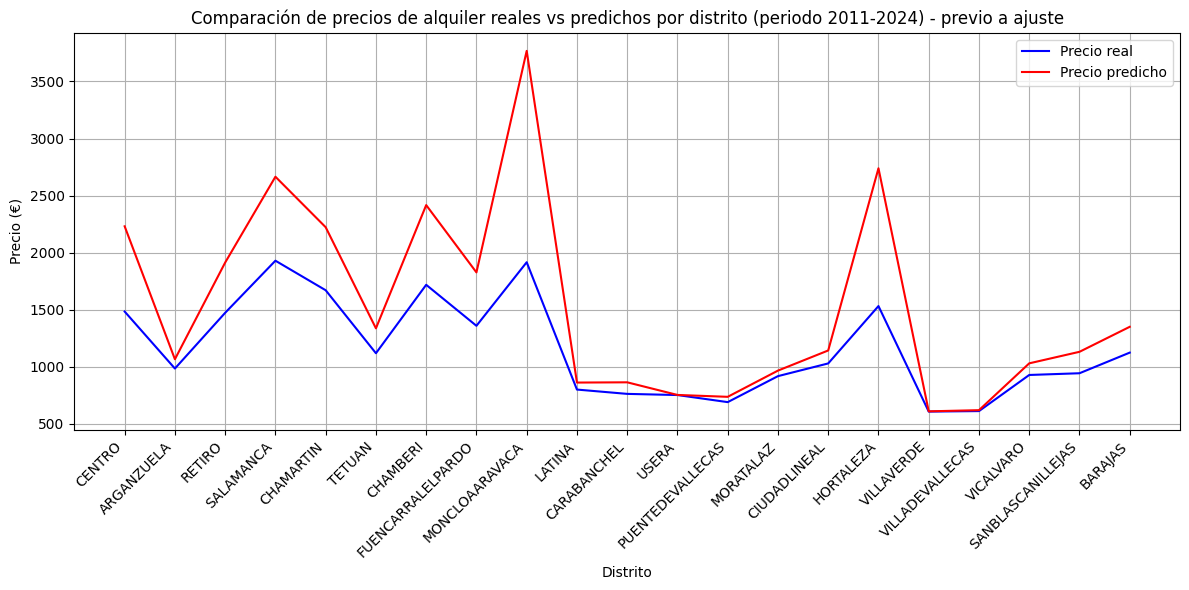

In [10]:
comparar_precios(df_prueba, operacion='alquiler', ajustado=False)

--> Gráfica guardada en reports/figures/precio_alquiler_real_vs_predicho_posterior.png


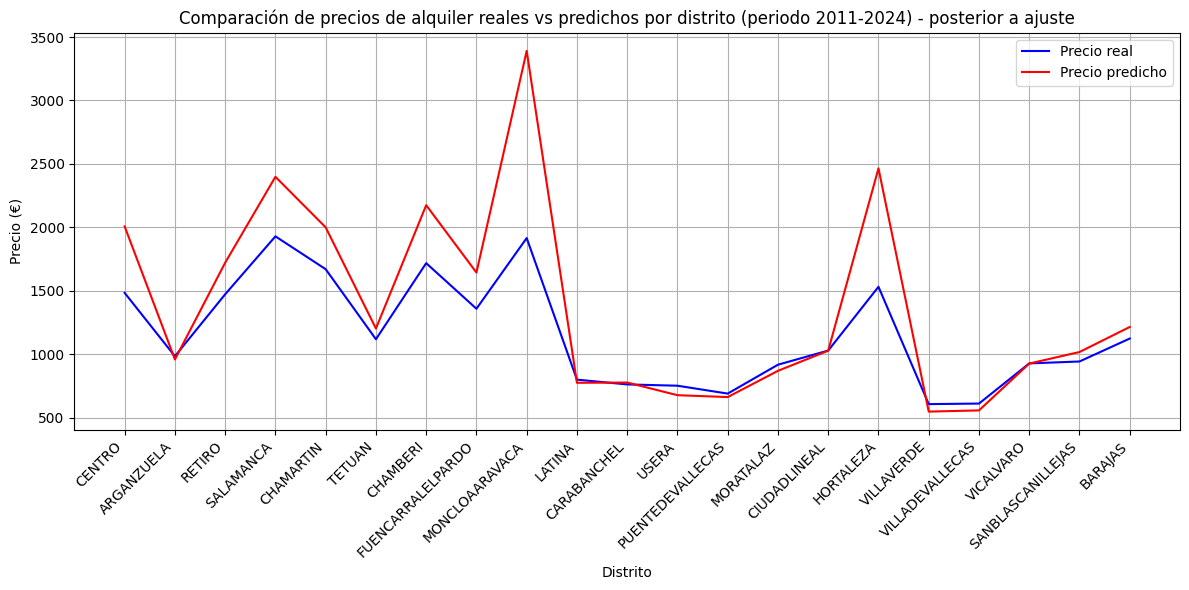

In [11]:
comparar_precios(df_prueba, operacion='alquiler', ajustado=True)